In [1]:
# TASK 1 - Load the Data
#Loading all three CSVs into separate Pandas DataFrames
import pandas as pd
import numpy as np

# Load the CSV files into separate DataFrames
df1 = pd.read_csv('sales_data.csv')
df2 = pd.read_csv('product_info.csv')
df3 = pd.read_csv('customer_info.csv')

# Display the first few rows of each DataFrame
print("DataFrame 1:Sales Data")
print(df1.head())

print("\nDataFrame 2:Product Info")
print(df2.head())

print("\nDataFrame 3:Customer Info")
print(df3.head())



DataFrame 1:Sales Data
  order_id customer_id product_id quantity  unit_price  order_date  \
0  O966977      C00397      P0022        3       39.25  06-07-2025   
1  O696648      C00236      P0023        5       18.92  06-07-2025   
2  O202644      C00492      P0011        1       29.68  07-07-2025   
3  O501803      C00031      P0003        1       32.76  08-07-2025   
4  O322242      C00495      P0016        1       47.62  08-07-2025   

  delivery_status payment_method   region  discount_applied  
0       Delivered         PayPal  Central              0.00  
1         DELAYED    credit card    North              0.00  
2       delivered  Bank Transfer    North              0.15  
3      Cancelled     Credit Card  Central              0.20  
4         DELAYED    Credit Card     West              0.20  

DataFrame 2:Product Info
  product_id             product_name       category launch_date  base_price  \
0      P0001       Storage Product 39        Storage    11-03-25       15.88  

In [2]:
## TASK 2- Clean the Data - DF- 1 - Sales Data
# Replace 'Nrth' with 'North'
df1['region'] = df1['region'].replace('Nrth', 'North')

# Standardise text formatting using .str.strip(), .str.lower() or .str.title():

str_cols = df1.select_dtypes(include=["object"]).columns

for col in str_cols:
    df1[col] = df1[col].str.strip().str.lower().str.title()
    print(f"\nFirst 10 unique values in {col}: {df1[col].unique()[:10]}")



First 10 unique values in order_id: ['O966977' 'O696648' 'O202644' 'O501803' 'O322242' 'O190175' 'O272646'
 'O411881' 'O170570' 'O619944']

First 10 unique values in customer_id: ['C00397' 'C00236' 'C00492' 'C00031' 'C00495' 'C00388' 'C00328' 'C00201'
 'C00076' 'C00330']

First 10 unique values in product_id: ['P0022' 'P0023' 'P0011' 'P0003' 'P0016' 'P0005' 'P0027' 'P0019' 'P0030'
 'P0002']

First 10 unique values in quantity: ['3' '5' '1' '2' '4' nan 'Three' 'Five']

First 10 unique values in order_date: ['06-07-2025' '07-07-2025' '08-07-2025' '10-07-2025' '12-07-2025'
 '14-07-2025' '16-07-2025' '18-07-2025' '20-07-2025' '22-07-2025']

First 10 unique values in delivery_status: ['Delivered' 'Delayed' 'Cancelled' 'Delrd' 'Delyd' nan]

First 10 unique values in payment_method: ['Paypal' 'Credit Card' 'Bank Transfer' nan 'Bank Transfr']

First 10 unique values in region: ['Central' 'North' 'West' 'East' 'South' 'Nrth']


In [3]:
## TASK 2 : CLEAN THE DATA - Data Frame 1 : SALES DATA

# Convert date column to datetime for DF1- Sales Data
# Sales Data: order_date
df1['order_date'] = pd.to_datetime(df1['order_date'].astype(str).str.strip(), format='%d-%m-%Y', errors='coerce')

## Check missing values per column
print(df1.isnull().sum())

## Fill Missing Values

# Numeric columns - since a missing discount means no discount applied
df1["discount_applied"] = df1["discount_applied"].fillna(0.0)

# Categorical columns - Filled with `"Unknown"` to preserve records without introducing bias.
df1["delivery_status"] = df1["delivery_status"].fillna("Unknown")

# Clean delivery_status column
df1["delivery_status"] = df1["delivery_status"].str.strip().str.capitalize()

# Replace common typos/misspellings
df1["delivery_status"] = df1["delivery_status"].replace({
    "Delrd":"Delivered",
    "Delvrd":"Delivered",
    "Delyd":"Delayed",
    "Delayd":"Delayed",
    "Canc":"Cancelled",
    "Cncl":"Cancelled",
    "Unknown":"Unknown"   # keep if you want to track missing values
})


print(df1["delivery_status"].unique())


# Missing Dates fill with .fillna()- Converted to datetime. Missing values kept as `NaT` instead of imputing fake dates.

# Verify missing values again
print("\nVerify Missing Values Again:\n", df1.isnull().sum())


## ---  Removing Duplicates --
# - Removed duplicate rows by `order_id` (kept first occurrence).  
# - If no `order_id` column, full-row duplicates were dropped. 

# Count how many duplicate order_ids exist
duplicate_count = df1["order_id"].duplicated().sum()
print("Number of duplicate order_ids:", duplicate_count)

# Show rows that are duplicates based on order_id
print(df1[df1["order_id"].duplicated()])

 
# Keep the first occurrence and drop the rest
df1 = df1.drop_duplicates(subset=["order_id"], keep="first")

print("Duplicates after removal:", df1["order_id"].duplicated().sum())

## Validate numeric columns: Ensure quantity, unit_price, and discount_applied are all non-negative

# List of numeric columns
numeric_cols = ["quantity", "unit_price", "discount_applied"]

# Step 1: Convert to numeric (invalid entries become NaN)
for col in numeric_cols:
    df1[col] = pd.to_numeric(df1[col], errors="coerce")

# Step 2: Check for negative values
for col in numeric_cols:
    neg_count = (df1[col] < 0).sum()
    print(f"Number of negative values in {col}: {neg_count}")

## Printing first 5 rows of data frame 1 - Sales data
print(df1.head())        # prints first 5 rows


order_id              1
customer_id           2
product_id            5
quantity              3
unit_price            1
order_date            2
delivery_status       3
payment_method        3
region                0
discount_applied    517
dtype: int64
['Delivered' 'Delayed' 'Cancelled' 'Unknown']

Verify Missing Values Again:
 order_id            1
customer_id         2
product_id          5
quantity            3
unit_price          1
order_date          2
delivery_status     0
payment_method      3
region              0
discount_applied    0
dtype: int64
Number of duplicate order_ids: 2
     order_id customer_id product_id quantity  unit_price order_date  \
1461  O515400      C00389      P0027        2       22.04 2025-07-28   
2712  O916245      C00070      P0011        3       20.83 2025-06-27   

     delivery_status payment_method region  discount_applied  
1461         Delayed         Paypal  North              0.05  
2712         Delayed  Bank Transfer   West              0.05 

In [4]:
## TASK 2- Clean the Data- DF - 2 : Product Info
# Standardise text formatting using .str.strip(), .str.lower() or .str.title():
str_cols = df2.select_dtypes(include=["object"]).columns

for col in str_cols:
    df2[col] = df2[col].str.strip().str.lower().str.title()
    
    print(f"\nUnique values in {col}: {df2[col].unique()}")



Unique values in product_id: ['P0001' 'P0002' 'P0003' 'P0004' 'P0005' 'P0006' 'P0007' 'P0008' 'P0009'
 'P0010' 'P0011' 'P0012' 'P0013' 'P0014' 'P0015' 'P0016' 'P0017' 'P0018'
 'P0019' 'P0020' 'P0021' 'P0022' 'P0023' 'P0024' 'P0025' 'P0026' 'P0027'
 'P0028' 'P0029' 'P0030']

Unique values in product_name: ['Storage Product 39' 'Cleaning Product 82' 'Cleaning Product 85'
 'Kitchen Product 82' 'Personal Care Product 1' 'Cleaning Product 16'
 'Personal Care Product 64' 'Storage Product 47' 'Outdoors Product 13'
 'Cleaning Product 70' 'Kitchen Product 53' 'Cleaning Product 29'
 'Cleaning Product 94' 'Outdoors Product 91' 'Storage Product 10'
 'Cleaning Product 53' 'Personal Care Product 11' 'Storage Product 37'
 'Kitchen Product 42' 'Cleaning Product 40' 'Kitchen Product 70'
 'Cleaning Product 86' 'Outdoors Product 32' 'Storage Product 87'
 'Cleaning Product 84' 'Storage Product 50' 'Outdoors Product 55'
 'Outdoors Product 53' 'Cleaning Product 69' 'Cleaning Product 72']

Unique values in 

In [5]:
## TASK 2 : CLEAN THE DATA - Data Frame 2 : PRODUCT INFO


#  Convert to datetime
# Example if format is DD/MM/YYYY
# Product Info: launch_date
df2['launch_date'] = pd.to_datetime(df2['launch_date'].str.strip(), format='%d-%m-%y', errors='coerce')

# 4. Verify
print(df2[["product_id", "launch_date"]].head(10))
print("Missing launch_date:", df2["launch_date"].isna().sum())
print(df2["launch_date"].dtype)


## Check missing values per column
print(df2.isnull().sum())

# Missing Dates fill with .fillna()- Converted to datetime. Missing values kept as `NaT` instead of imputing fake dates.
#df2["launch_date"] = df2["launch_date"].fillna("Unknown Date")  


## ---  Removing Duplicates --
# - Removed duplicate rows by `order_id` (kept first occurrence).  
# - If no `order_id` column, full-row duplicates were dropped. 

# Count how many duplicate order_ids exist
duplicate_count = df2["product_id"].duplicated().sum()
print("Number of duplicate order_ids:", duplicate_count)

 
## Printing first 5 rows of data frame 2 - Product Info
print(df2.head())        # prints first 5 rows

  product_id launch_date
0      P0001  2025-03-11
1      P0002  2024-08-18
2      P0003  2024-07-15
3      P0004  2025-04-19
4      P0005  2024-10-20
5      P0006  2024-10-09
6      P0007  2024-09-30
7      P0008  2024-08-29
8      P0009  2025-04-18
9      P0010  2024-08-14
Missing launch_date: 0
datetime64[ns]
product_id       0
product_name     0
category         0
launch_date      0
base_price       0
supplier_code    0
dtype: int64
Number of duplicate order_ids: 0
  product_id             product_name       category launch_date  base_price  \
0      P0001       Storage Product 39        Storage  2025-03-11       15.88   
1      P0002      Cleaning Product 82       Cleaning  2024-08-18       34.23   
2      P0003      Cleaning Product 85       Cleaning  2024-07-15        7.92   
3      P0004       Kitchen Product 82        Kitchen  2025-04-19        9.13   
4      P0005  Personal Care Product 1  Personal Care  2024-10-20       31.10   

  supplier_code  
0          S339  
1         

In [6]:
## TASK 2- Clean the Data - DF - 3 - Customer Info
# Standardise text formatting using .str.strip(), .str.lower() or .str.title():
str_cols = df3.select_dtypes(include=["object"]).columns

for col in str_cols:
    df3[col] = df3[col].str.strip().str.lower().str.title()
    print(f"\nFirst 10 unique values in {col}: {df3[col].unique()[:10]}")



First 10 unique values in customer_id: ['C00001' 'C00002' 'C00003' 'C00004' 'C00005' 'C00006' 'C00007' 'C00008'
 'C00009' 'C00010']

First 10 unique values in email: ['Shaneramirez@Gmail.Com' 'Jpeterson@Bernard.Com'
 'Howardmaurice@Yahoo.Com' 'Yherrera@Arnold.Org' 'Janetwilliams@Gmail.Com'
 'Wyattmichelle@Yahoo.Com' 'Francisco53@Hotmail.Com'
 'Amandasanchez@Gray-Mayo.Net' 'Perezantonio@Yahoo.Com'
 'Clarksherri@Hotmail.Com']

First 10 unique values in signup_date: ['26-04-25' '11-08-24' '15-05-25' '14-06-25' '02-05-25' '21-10-24'
 '17-10-24' '29-09-24' '08-12-24' '05-11-24']

First 10 unique values in gender: ['Male' 'Female' 'Other' 'Femle' nan]

First 10 unique values in region: ['Central' 'West' 'North' 'South' 'East' nan]

First 10 unique values in loyalty_tier: ['Silver' 'Gold' 'Bronze' 'Gld' nan 'Brnze' 'Sllver']


In [7]:
## TASK 2 : CLEAN THE DATA - Data Frame 3 : CUSTOMER INFO

# Convert date column to datetime for DF3 - customer_info

# Convert signup_date to datetime safely
df3['signup_date'] = pd.to_datetime(df3['signup_date'], format='%d-%m-%y', errors='coerce')

# Check results
print(df3[['customer_id', 'signup_date']].head(10))
print("Number of invalid/missing signup dates:", df3['signup_date'].isna().sum())


## Check missing values per column
print(df3.isnull().sum())

## Fill Missing Values

# Categorical columns - Filled with `"Unknown"` to preserve records without introducing bias.
df3["customer_id"] = df3["customer_id"].fillna("Unknown")
df3["email"] = df3["email"].fillna("Unknown email")
df3["gender"] = df3["gender"].fillna("Other")
df3["region"] = df3["region"].fillna("Unknown")
df3["loyalty_tier"] = df3["loyalty_tier"].fillna("Unknown")

# Create a mapping dictionary
replace_dict = {
    "Slver": "Silver",
    "Sllver": "Silver",
    "Gld": "Gold",
    "Brnze": "Bronze"
}

# Replace values in the column
df3["loyalty_tier"] = df3["loyalty_tier"].replace(replace_dict)
df3['region'] = df3['region'].replace('Nrth', 'North')




## ---  Removing Duplicates --
# - Removed duplicate rows by `order_id` (kept first occurrence).  
# - If no `order_id` column, full-row duplicates were dropped. 

# Count how many duplicate customer_id exist
duplicate_count = df3["customer_id"].duplicated().sum()

print("Number of duplicate customer_id:", duplicate_count)

# Show rows that are duplicates based on order_id
print(df3[df3["customer_id"].duplicated()])

# Since both the duplicate customer ids are unknown with diff email id so no need to drop the row.

## Printing first 5 rows of data frame 3 - Customer Info
print(df3.head())        # prints first 5 rows

  customer_id signup_date
0      C00001  2025-04-26
1      C00002  2024-08-11
2      C00003  2025-05-15
3      C00004  2025-06-14
4      C00005  2025-05-02
5      C00006  2024-10-21
6      C00007  2024-10-17
7      C00008  2024-09-29
8      C00009  2024-12-08
9      C00010  2024-11-05
Number of invalid/missing signup dates: 4
customer_id     3
email           6
signup_date     4
gender          4
region          3
loyalty_tier    2
dtype: int64
Number of duplicate customer_id: 2
    customer_id                     email signup_date gender   region  \
371     Unknown          Ohayes@Gmail.Com  2024-12-09  Other  Central   
470     Unknown  Nancygonzalez@Wright.Com  2025-06-27   Male  Central   

    loyalty_tier  
371       Silver  
470       Silver  
  customer_id                    email signup_date  gender   region  \
0      C00001   Shaneramirez@Gmail.Com  2025-04-26    Male  Central   
1      C00002    Jpeterson@Bernard.Com  2024-08-11  Female  Central   
2      C00003  Howardmauri

In [8]:
## TASK 3: Merge the Data
# Step 1: Merge sales_data with product_info on product_id
merged_df = pd.merge(df1, df2, on="product_id", how="left")
# Step 2: Then merge the result with customer_info using customer_id
merged_df = pd.merge(merged_df, df3, on="customer_id", how="left")

gender_fix = {
    'Femle': 'Female',
    'Fmale': 'Female',
    'Male': 'Male',
    'Other': 'Other'
}

merged_df['gender'] = merged_df['gender'].replace(gender_fix)
merged_df['gender'] = merged_df['gender'].fillna('Unknown')
merged_df['region_x'] = merged_df['region_x'].replace('Nrth', 'North')
merged_df['region_y'] = merged_df['region_y'].replace('Nrth', 'North')




# Convert to datetime, invalid parsing will become NaT
#merged_df['signup_date'] = pd.to_datetime(merged_df['signup_date'], format='%d-%m-%Y', errors='coerce')


# Check structure and column types
print(merged_df.info())

# View first 5 rows
print(merged_df.head())





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   order_id          2997 non-null   object        
 1   customer_id       2996 non-null   object        
 2   product_id        2993 non-null   object        
 3   quantity          2993 non-null   float64       
 4   unit_price        2997 non-null   float64       
 5   order_date        2996 non-null   datetime64[ns]
 6   delivery_status   2998 non-null   object        
 7   payment_method    2995 non-null   object        
 8   region_x          2998 non-null   object        
 9   discount_applied  2998 non-null   float64       
 10  product_name      2993 non-null   object        
 11  category          2993 non-null   object        
 12  launch_date       2993 non-null   datetime64[ns]
 13  base_price        2993 non-null   float64       
 14  supplier_code     2993 n

In [9]:
## TASK 4: Feature Engineering
# Create the following new columns:

#  Ensure date columns are datetime
date_cols = ["order_date", "launch_date", "signup_date"]
for col in date_cols:
   if col in merged_df.columns:
       merged_df[col] = pd.to_datetime(merged_df[col], errors="coerce")
        
# 1. revenue = quantity × unit_price × (1 - discount_applied)
merged_df["revenue"] = merged_df["quantity"] * merged_df["unit_price"] * (1 - merged_df["discount_applied"])
print("Revenue:")
print(merged_df["revenue"].head())

# 2. order_week = ISO week from order_date

merged_df["order_week"] = merged_df["order_date"].dt.isocalendar().week
print("\nOrder week:")
print(merged_df["order_week"].head())

# 3. price_band = Categorise unit price as Low (<£15), Medium (£15–30), High (>£30)
bins = [0, 15, 30, float('inf')]
labels = ["Low", "Medium", "High"]
merged_df["price_band"] = pd.cut(merged_df["unit_price"], bins=bins, labels=labels, right=False)
print("\nPrice band:")
print(merged_df["price_band"].head())

# 4. days_to_order = Days between launch_date and order_date
merged_df["days_to_order"] = (merged_df["order_date"] - merged_df["launch_date"]).dt.days

# 5. email_domain = Extract domain from email (e.g., gmail.com)
merged_df["email_domain"] = merged_df["email"].apply(
    lambda x: x.split("@")[1] if pd.notnull(x) and "@" in x else None
)

# 6. is_late = True if delivery_status is "Delayed"
merged_df["is_late"] = merged_df["delivery_status"].map(lambda x: True if x == "Delayed" else False)

print(merged_df.columns)

print(merged_df[["order_date", "launch_date"]].head(10))
print(merged_df[["order_date", "launch_date"]].dtypes)

print(merged_df[["revenue", "order_week", "price_band", "days_to_order", "email_domain", "is_late"]].head())



Revenue:
0    117.750
1     94.600
2     25.228
3     26.208
4     38.096
Name: revenue, dtype: float64

Order week:
0    27
1    27
2    28
3    28
4    28
Name: order_week, dtype: UInt32

Price band:
0      High
1    Medium
2    Medium
3      High
4      High
Name: price_band, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']
Index(['order_id', 'customer_id', 'product_id', 'quantity', 'unit_price',
       'order_date', 'delivery_status', 'payment_method', 'region_x',
       'discount_applied', 'product_name', 'category', 'launch_date',
       'base_price', 'supplier_code', 'email', 'signup_date', 'gender',
       'region_y', 'loyalty_tier', 'revenue', 'order_week', 'price_band',
       'days_to_order', 'email_domain', 'is_late'],
      dtype='object')
  order_date launch_date
0 2025-07-06  2024-10-04
1 2025-07-06  2025-01-18
2 2025-07-07  2025-03-25
3 2025-07-08  2024-07-15
4 2025-07-08  2025-02-20
5 2025-07-10  2024-10-20
6 2025-07-12  2024-09-21
7 2025-07-14  2024

In [10]:
## TASK 5 :  Create Summary Tables : Using groupby(), agg(), pivot_table(), or query()
# -------------------------------
# Create Summary Tables Safely
# -------------------------------
# Use region_x as the main region column
merged_df["region"] = merged_df["region_x"].fillna(merged_df["region_y"])
merged_df["signup_date"] = pd.to_datetime(
    merged_df["signup_date"].replace("Unknown Date", pd.NA),
    errors="coerce"
)
merged_df["signup_month"] = merged_df["signup_date"].dt.to_period("M").astype(str)


# Weekly Revenue Trends by Region

if all(col in merged_df.columns for col in ["order_week", "region", "revenue"]):
    weekly_revenue = merged_df.dropna(subset=["order_week", "region", "revenue"]).groupby(
        ["order_week", "region"]
    ).agg(total_revenue=("revenue", "sum")).reset_index()
    print("Weekly Revenue Trends by Region:\n", weekly_revenue.head(), "\n")

# Product Category Performance

if all(col in merged_df.columns for col in ["category", "revenue", "quantity", "discount_applied"]):
    category_performance = merged_df.dropna(subset=["category"]).groupby("category").agg(
        total_revenue=("revenue", "sum"),
        total_quantity=("quantity", "sum"),
        avg_discount=("discount_applied", "mean")
    ).reset_index()
    print("Product Category Performance:\n", category_performance.head(), "\n")

# Customer Behaviour by Loyalty Tier and Signup Month

if all(col in merged_df.columns for col in ["loyalty_tier", "signup_month", "revenue", "order_id"]):
    customer_behaviour = merged_df.dropna(subset=["loyalty_tier", "signup_month"]).groupby(
        ["loyalty_tier", "signup_month"]
    ).agg(
        total_revenue=("revenue", "sum"),
        total_orders=("order_id", "count")
    ).reset_index()

   
    print("Customer Behaviour by Loyalty Tier and Signup Month:\n", customer_behaviour.head(), "\n")

# Delivery Performance by Region and Price Band

if all(col in merged_df.columns for col in ["region", "price_band", "order_id", "is_late"]):
    delivery_perf = merged_df.dropna(subset=["region", "price_band"]).groupby(
        ["region", "price_band"],observed=False).agg(
        total_orders=("order_id", "count"),
        delayed_orders=("is_late", "sum")
    ).reset_index()
    delivery_perf["pct_delayed"] = delivery_perf["delayed_orders"] / delivery_perf["total_orders"] * 100
    print("Delivery Performance by Region and Price Band:\n", delivery_perf.head(), "\n")

# Preferred Payment Methods by Loyalty Tier

if all(col in merged_df.columns for col in ["loyalty_tier", "payment_method", "order_id"]):
    payment_pref = merged_df.dropna(subset=["loyalty_tier", "payment_method"]).groupby(
        ["loyalty_tier", "payment_method"]
    ).agg(total_orders=("order_id", "count")).reset_index()
    
    payment_pref_pivot = payment_pref.pivot_table(
        index="loyalty_tier",
        columns="payment_method",
        values="total_orders",
        fill_value=0
    )
    print("Preferred Payment Methods by Loyalty Tier:\n", payment_pref_pivot.head())

Weekly Revenue Trends by Region:
    order_week   region  total_revenue
0          14  Central        68.7600
1          14     East        70.1230
2          14    North       195.1840
3          14     West        53.8365
4          15  Central        16.0650 

Product Category Performance:
         category  total_revenue  total_quantity  avg_discount
0       Cleaning     93621.7840          3584.0      0.085685
1        Kitchen     33933.6760          1226.0      0.075622
2       Outdoors     40062.0680          1523.0      0.082150
3  Personal Care     24916.6365           902.0      0.086755
4        Storage     46931.4575          1730.0      0.080763 

Customer Behaviour by Loyalty Tier and Signup Month:
   loyalty_tier signup_month  total_revenue  total_orders
0       Bronze      2024-07      4038.7480            57
1       Bronze      2024-08      3831.0110            46
2       Bronze      2024-09      2685.4130            36
3       Bronze      2024-10      4247.2735       

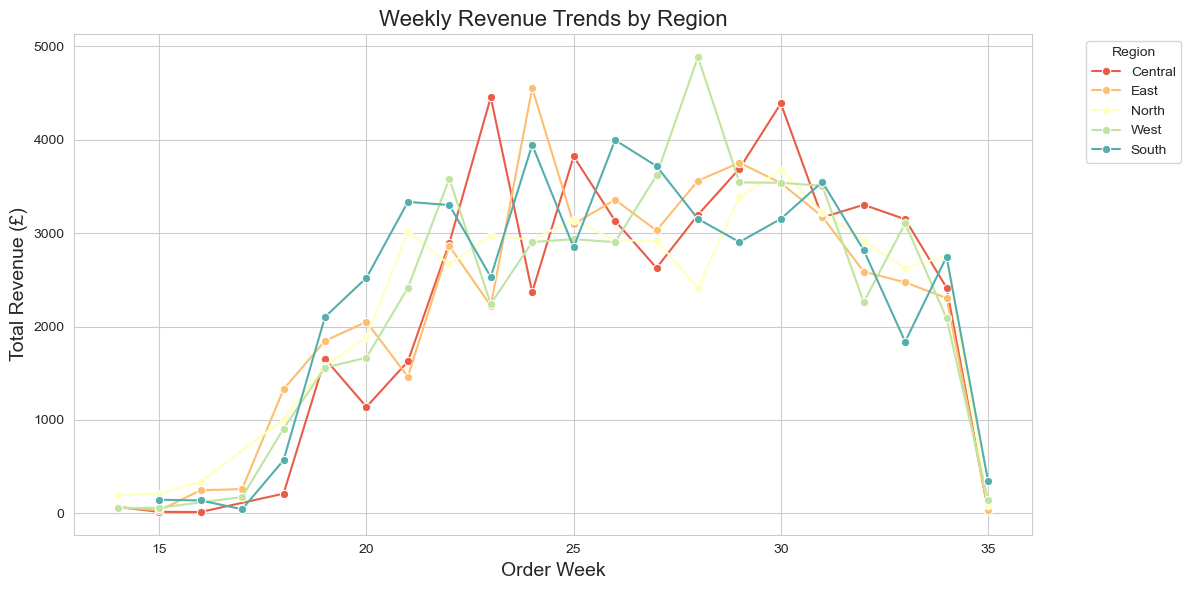

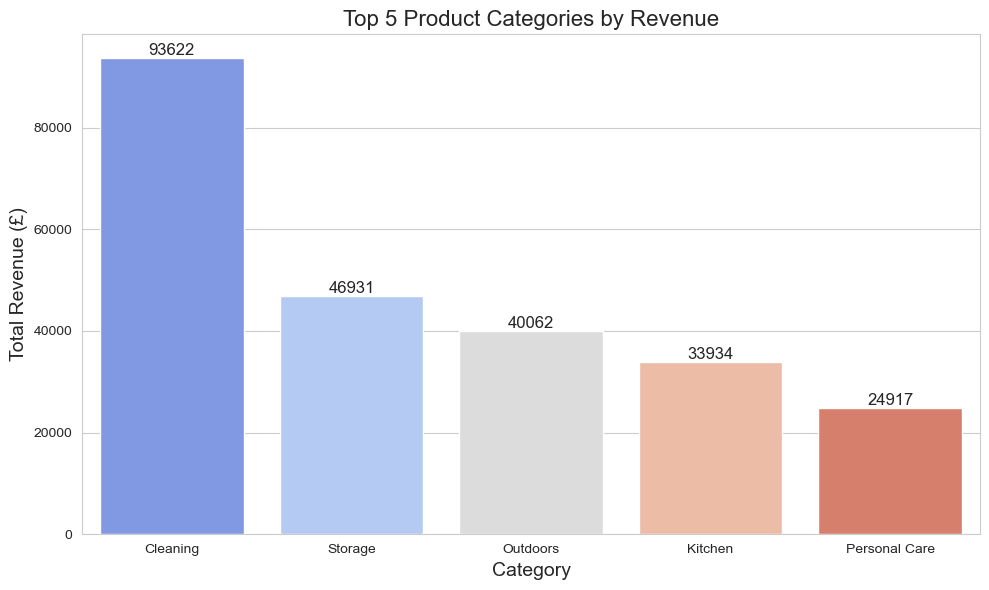

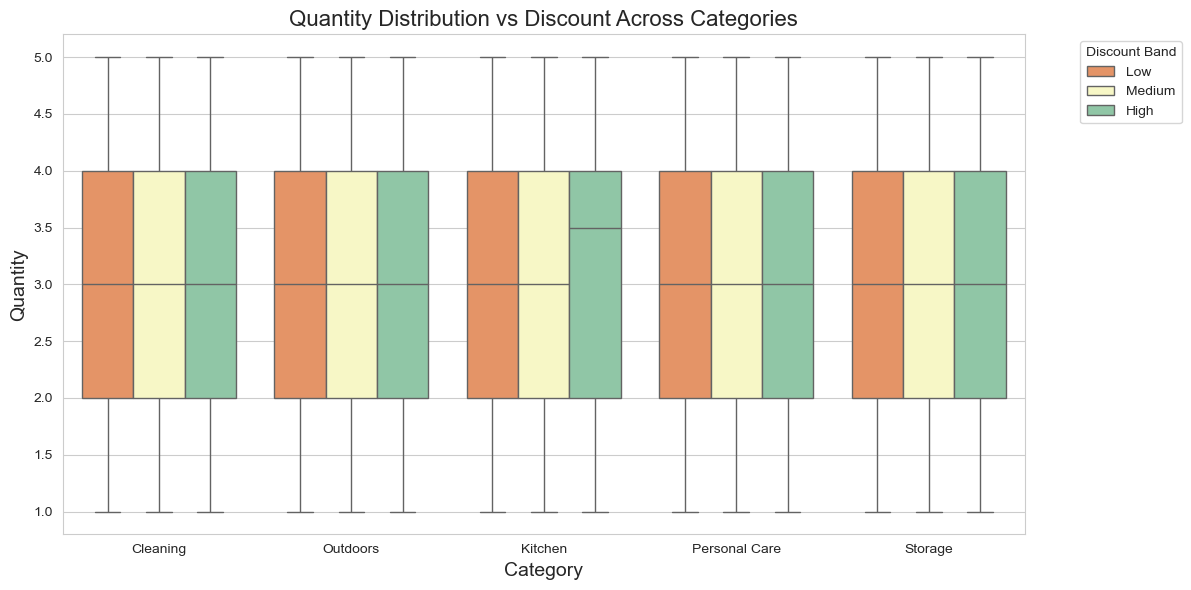

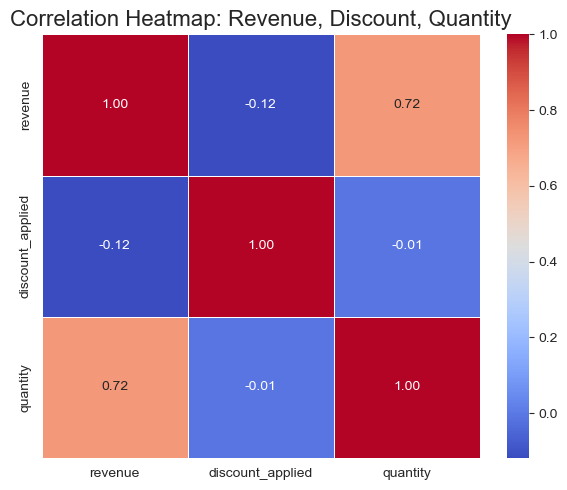

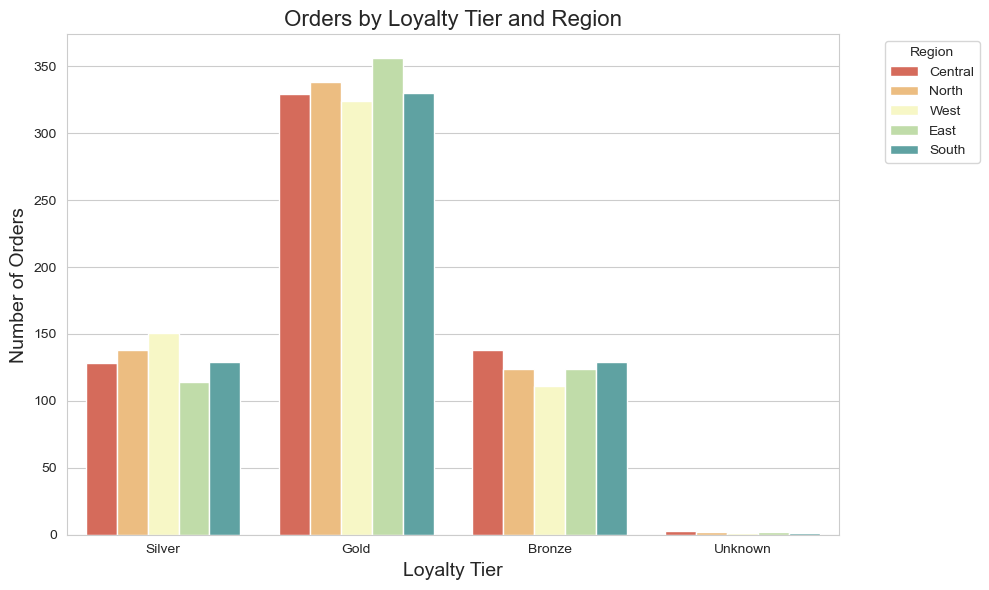

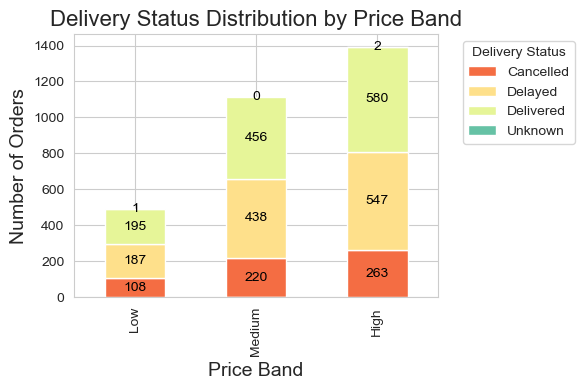

In [15]:
## TASK 6 : Visual Exploration using Matplotlib and Seaborn


import matplotlib.pyplot as plt
import seaborn as sns

# Set style and figure defaults
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.titlesize"] = 16
plt.rcParams["axes.labelsize"] = 14

# -------------------------------
# 1. Line plot - Weekly Revenue Trends by Region (Cool/Warm)
# -------------------------------

weekly_rev_plot = merged_df.groupby(["order_week", "region_x"], observed=False).agg(
    total_revenue=("revenue","sum")
).reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(
    data=weekly_rev_plot, 
    x="order_week", 
    y="total_revenue", 
    hue="region_x", 
    marker="o", 
    palette=sns.color_palette("Spectral", weekly_rev_plot["region_x"].nunique())
)
plt.title("Weekly Revenue Trends by Region")
plt.xlabel("Order Week")
plt.ylabel("Total Revenue (£)")
plt.legend(title="Region", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

# -------------------------------
# 2. Bar chart - Top 5 Categories by Revenue (Vibrant Cool/Warm)
# -------------------------------


top_categories = merged_df.groupby("category", observed=False).agg(total_revenue=("revenue","sum")).sort_values("total_revenue", ascending=False).head(5).reset_index()
colors = sns.color_palette("coolwarm", len(top_categories))

plt.figure(figsize=(10,6))
ax = sns.barplot(data=top_categories, x="category", y="total_revenue", hue="category", palette=colors, legend=False)
plt.title("Top 5 Product Categories by Revenue")
plt.xlabel("Category")
plt.ylabel("Total Revenue (£)")

# Annotate values on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.show()

# -------------------------------
# 3. Boxplot - Quantity vs Discount across Categories
# -------------------------------

merged_df['discount_band'] = pd.cut(merged_df['discount_applied'], bins=[-0.01, 0.05, 0.15, 1.0], labels=["Low","Medium","High"])
plt.figure(figsize=(12,6))
sns.boxplot(
    data=merged_df, 
    x="category", 
    y="quantity", 
    hue="discount_band", 
    palette=sns.color_palette("Spectral", 3)
)
plt.title("Quantity Distribution vs Discount Across Categories")
plt.xlabel("Category")
plt.ylabel("Quantity")
plt.legend(title="Discount Band", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

merged_df.groupby(
    ["category", "discount_band"], observed=True
)["quantity"].describe()


# -------------------------------
# 4. Heatmap - Correlation between Revenue, Discount, and Quantity
# -------------------------------
corr_df = merged_df[["revenue", "discount_applied", "quantity"]].corr()
plt.figure(figsize=(6,5))
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap: Revenue, Discount, Quantity")
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Countplot - Orders by Loyalty Tier (Hue = Region, Vibrant)
# -------------------------------

merged_df["region_x"] = merged_df["region_x"].replace({
    "Nrth": "North"
})

# Plot again with vibrant colors
plt.figure(figsize=(10,6))
sns.countplot(
    data=merged_df, 
    x="loyalty_tier", 
    hue="region_x", 
    palette=sns.color_palette("Spectral", merged_df["region_x"].nunique())
)
plt.title("Orders by Loyalty Tier and Region")
plt.xlabel("Loyalty Tier")
plt.ylabel("Number of Orders")
plt.legend(title="Region", bbox_to_anchor=(1.05,1), loc="upper left")
plt.tight_layout()
plt.show()

# -------------------------------
# 6. Stacked Bar Chart - Delivery Status by Price Band (Cool/Warm)
# -------------------------------

delivery_plot = merged_df.groupby(["price_band", "delivery_status"], observed=False).size().unstack(fill_value=0)
colors = sns.color_palette("Spectral", delivery_plot.shape[1])

fig, ax = plt.subplots(figsize=(6, 4))
delivery_plot.plot(kind="bar", stacked=True, color=colors, ax=ax)

# Add labels to the bars
for i, (_, row) in enumerate(delivery_plot.iterrows()):
    cumulative_height = 0
    for j, value in enumerate(row):
        ax.text(i, cumulative_height + value / 2, str(int(value)), ha='center', va='center', color='black')
        cumulative_height += value

plt.title("Delivery Status Distribution by Price Band")
plt.xlabel("Price Band")
plt.ylabel("Number of Orders")
plt.legend(title="Delivery Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [12]:
## TASK 8 - Optional Stretch Tasks- Use .query() to extract:
# 1. Customers who signed up in Q2
# Extract customers who signed up in Q2
q2_customers = merged_df.query('signup_date.dt.quarter == 2')
print("=== Customers Who Signed Up in Q2 ===")
print(q2_customers[['customer_id', 'signup_date']]) # Show results

# 2. Customers who placed an order within 14 days
within_14_days = merged_df.query('(order_date - signup_date).dt.days <= 14')
print("=== Customers who placed order within 14 days===")
print(within_14_days[['customer_id', 'signup_date', 'order_date']]) # Show results

# 3. Customers who received a discount > 20%

high_discount_customers = merged_df.query('discount_applied > 0.2')
print("===  Customers who received a discount > 20% ===")
print(high_discount_customers[['customer_id', 'order_id', 'discount_applied']])


=== Customers Who Signed Up in Q2 ===
     customer_id signup_date
20        C00211  2025-05-17
22        C00369  2025-06-27
32        C00259  2025-06-25
33        C00464  2025-04-01
34        C00398  2025-06-15
...          ...         ...
2965      C00199  2025-05-19
2972      C00323  2025-04-25
2981      C00421  2025-05-16
2987      C00392  2025-04-29
2988      C00250  2025-05-14

[612 rows x 2 columns]
=== Customers who placed order within 14 days===
     customer_id signup_date order_date
81        C00056  2025-05-25 2025-05-28
89        C00259  2025-06-25 2025-05-20
90        C00126  2025-06-02 2025-05-19
93        C00139  2025-06-11 2025-05-16
98        C00221  2025-05-31 2025-05-11
...          ...         ...        ...
2917      C00203  2025-06-27 2025-06-11
2929      C00126  2025-06-02 2025-06-09
2935      C00004  2025-06-14 2025-06-08
2946      C00271  2025-06-16 2025-06-06
2949      C00139  2025-06-11 2025-05-17

[169 rows x 3 columns]
===  Customers who received a discoun

In [13]:
## TASK 8 - Use MinMaxScaler to normalise revenue or price
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Normalize 'revenue' column
merged_df['revenue_normalized'] = scaler.fit_transform(merged_df[['revenue']])

# Normalize 'price' column
merged_df['price_normalized'] = scaler.fit_transform(merged_df[['unit_price']])

merged_df_normalized = merged_df[['customer_id','revenue','unit_price','revenue_normalized', 'price_normalized']]
print("=== Normalized Revenue and Price columns using MinMaxScaler Between 0 and 1 ===")
print(merged_df_normalized)

print("=== Printing the Merged DataFrame - merged_df ===")

print(merged_df)

=== Normalized Revenue and Price columns using MinMaxScaler Between 0 and 1 ===
     customer_id  revenue  unit_price  revenue_normalized  price_normalized
0         C00397  117.750       39.25            0.457431          0.744225
1         C00236   94.600       18.92            0.361987          0.260062
2         C00492   25.228       29.68            0.075976          0.516313
3         C00031   26.208       32.76            0.080016          0.589664
4         C00495   38.096       47.62            0.129029          0.943558
...          ...      ...         ...                 ...               ...
2993      C00233  173.600       43.40            0.687693          0.843058
2994      C00246  108.928       34.04            0.421060          0.620148
2995      C00182   42.340       42.34            0.146526          0.817814
2996      C00074  179.800       35.96            0.713255          0.665873
2997      C00405  116.721       43.23            0.453189          0.839009

[2998 r

In [14]:
## TASK 8 : Flag underperforming products (low quantity, high discount, delayed deliveries)


# Create flag for underperforming products
merged_df['underperforming_flag'] = (
    (merged_df['quantity'] < 5) &
    (merged_df['discount_applied'] > 0.1) &
    (merged_df['delivery_status'] == 'Delayed')
)

# Filter only those rows
underperforming = merged_df.loc[
    merged_df['underperforming_flag'],
    ['product_id', 'quantity', 'discount_applied','region','delivery_status', 'underperforming_flag']
]

print("Underperforming Products:")
print(underperforming)


Underperforming Products:
     product_id  quantity  discount_applied   region delivery_status  \
4         P0016       1.0              0.20     West         Delayed   
9         P0002       1.0              0.15    South         Delayed   
20        P0019       1.0              0.15    South         Delayed   
32        P0009       2.0              0.20     East         Delayed   
45        P0029       1.0              0.20     West         Delayed   
...         ...       ...               ...      ...             ...   
2934      P0022       1.0              0.20    North         Delayed   
2946      P0018       3.0              0.15  Central         Delayed   
2948      P0001       3.0              0.20     East         Delayed   
2992      P0005       2.0              0.20  Central         Delayed   
2994      P0029       4.0              0.20     West         Delayed   

      underperforming_flag  
4                     True  
9                     True  
20                    